In [1]:
%matplotlib notebook

In [2]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime
from scipy.stats import linregress

In [4]:
state_data = "data/hail_reports_2.csv"


state = pd.read_csv(state_data)
state_df = pd.DataFrame(state)

state_df.head()

,Observation Time,Diameter (inches),Diameter (cm),Diameter (mm),Latitude,Longitude,Affected County
0,1990-04-01 15:00:00,0.75,1.91,19.05,35.85,-81.28,Alexander County NC
1,1990-04-01 16:30:00,1.00,2.54,25.40,35.23,-80.85,Mecklenburg County NC
2,1990-04-01 17:02:00,1.00,2.54,25.40,35.08,-80.52,Union County NC
3,1990-04-01 17:15:00,0.75,1.91,19.05,35.47,-81.27,Lincoln County NC
4,1990-04-01 17:38:00,1.75,4.45,44.45,35.00,-80.10,Anson County NC


In [5]:
state_df.nunique()

Observation Time     7503
Diameter (inches)      22
Diameter (cm)          22
Diameter (mm)          22
Latitude              870
Longitude            1356
Affected County       100
dtype: int64

In [6]:
state_df['Observation Time'].nunique

<bound method IndexOpsMixin.nunique of 0       1990-04-01 15:00:00
1       1990-04-01 16:30:00
2       1990-04-01 17:02:00
3       1990-04-01 17:15:00
4       1990-04-01 17:38:00
               ...         
7498    2019-09-09 16:57:00
7499    2019-09-13 13:33:00
7500    2019-09-30 13:05:00
7501    2019-09-30 13:39:00
7502    2019-09-30 16:52:00
Name: Observation Time, Length: 7503, dtype: object>

In [7]:
date = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date() for date in state_df.loc[:,"Observation Time"]] 
value = state_df.loc[:,"Observation Time"] 
value.head()

0    1990-04-01 15:00:00
1    1990-04-01 16:30:00
2    1990-04-01 17:02:00
3    1990-04-01 17:15:00
4    1990-04-01 17:38:00
Name: Observation Time, dtype: object

In [8]:
state_df['Year'] = pd.DatetimeIndex(state_df['Observation Time']).year
state = (state_df.groupby(['Year']).size().reset_index(name = "hail size"))
state

,Year,hail size
0,1990,125
1,1991,33
2,1992,102
3,1993,220
4,1994,96
5,1995,141
6,1996,205
7,1997,202
8,1998,450
9,1999,147


<IPython.core.display.Javascript object>


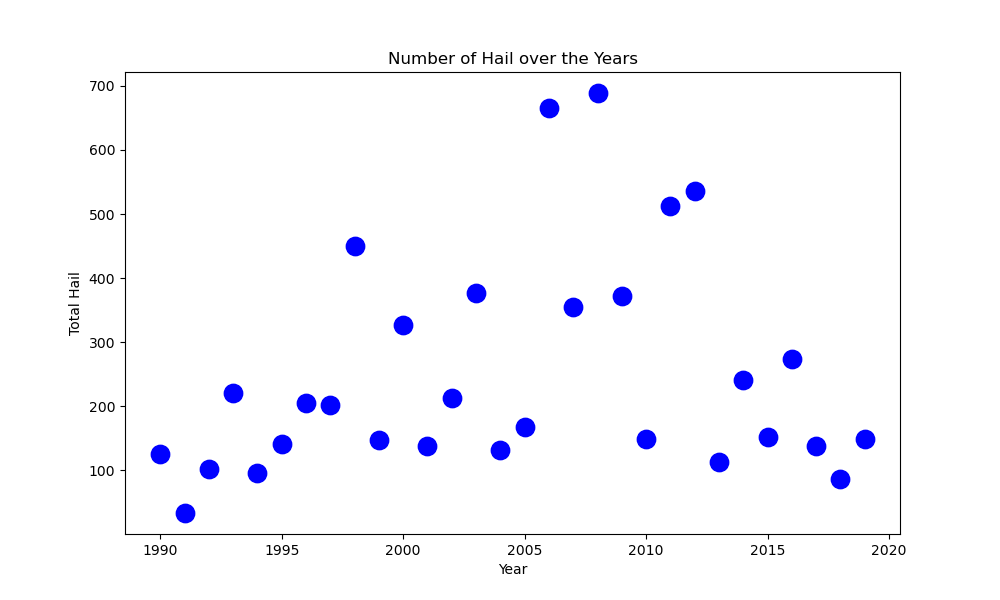

In [18]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
total_hail =(state_df.groupby(['Year']).size().reset_index(name = "hail reports"))

marker_size=15
plt.scatter(total_hail['Year'],total_hail['hail reports'],s=175, color="blue")
plt.title('Number of Hail over the Years',fontsize =12)
plt.xlabel('Year',fontsize =10)
plt.ylabel('Total Hail',fontsize =10)
plt.show()

In [19]:
corr=round(st.pearsonr(total_hail['Year'],total_hail['hail reports'])[0],2)
print(f"The correlation between hail over the years is {corr}")

The correlation between hail over the years is 0.2


In [20]:
x_values = total_hail['Year']
y_values = total_hail['hail reports']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print("slope", slope)
print("intercept", intercept)
print("rvalue (Correlation coefficient)", rvalue)
print("pandas (Correlation coefficient)", corr)
print("stderr", stderr)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope 3.878754171301445
intercept -7524.862736373746
rvalue (Correlation coefficient) 0.1978721201851459
pandas (Correlation coefficient) 0.2
stderr 3.6312459640045467
y = 3.88x + -7524.86


<IPython.core.display.Javascript object>


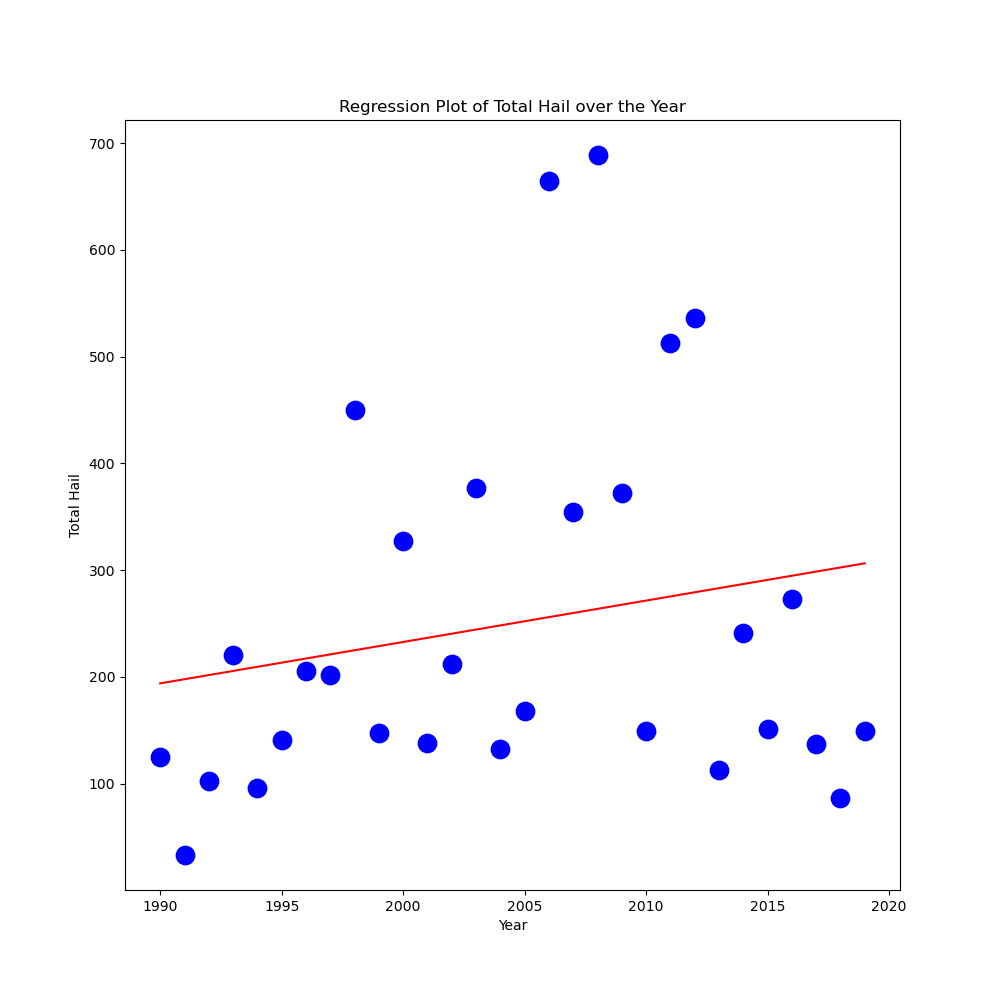

The r-squared is: 0.03915337594656483


<function matplotlib.pyplot.show(block=None)>

In [21]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Total Hail over the Year',fontsize =12)
plt.xlabel('Year',fontsize =10)
plt.ylabel('Total Hail',fontsize =10)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show

In [28]:
plt.savefig("data/YearHail.png")
plt.show()

In [22]:
state_df['Month'] = pd.DatetimeIndex(state_df['Observation Time']).month
state = (state_df.groupby(['Month']).size().reset_index(name = "hail reports "))
state

,Month,hail reports
0,1,34
1,2,65
2,3,486
3,4,1034
4,5,2326
5,6,1657
6,7,1069
7,8,539
8,9,202
9,10,77


<IPython.core.display.Javascript object>


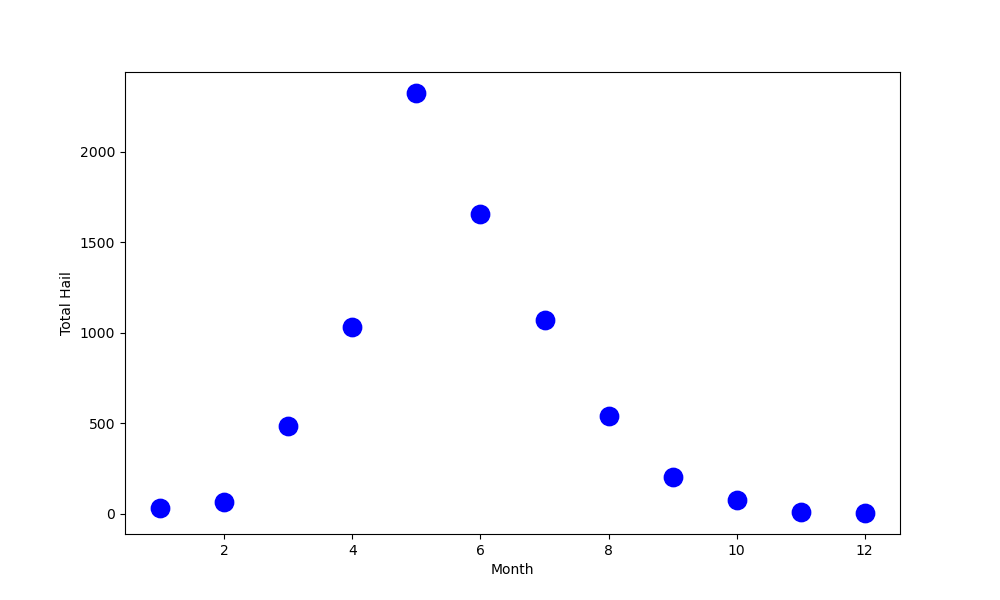

In [23]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
total_hail =(state_df.groupby(['Month']).size().reset_index(name = "hail reports"))

marker_size=15
plt.scatter(total_hail['Month'],total_hail['hail reports'],s=175, color="blue")
plt.title('',fontsize =12)
plt.xlabel('Month',fontsize =10)
plt.ylabel('Total Hail',fontsize =10)
plt.show()

In [24]:
corr=round(st.pearsonr(total_hail['Month'],total_hail['hail reports'])[0],2)
print(f"The correlation between hail over the months is {corr}")

The correlation between hail over the months is -0.23


In [26]:
x_values = total_hail['Month']
y_values = total_hail['hail reports']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print("slope", slope)
print("intercept", intercept)
print("rvalue (Correlation coefficient)", rvalue)
print("pandas (Correlation coefficient)", corr)
print("stderr", stderr)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope -48.24125874125875
intercept 938.8181818181819
rvalue (Correlation coefficient) -0.2306504508811558
pandas (Correlation coefficient) -0.23
stderr 64.35666529764548
y = -48.24x + 938.82


<IPython.core.display.Javascript object>


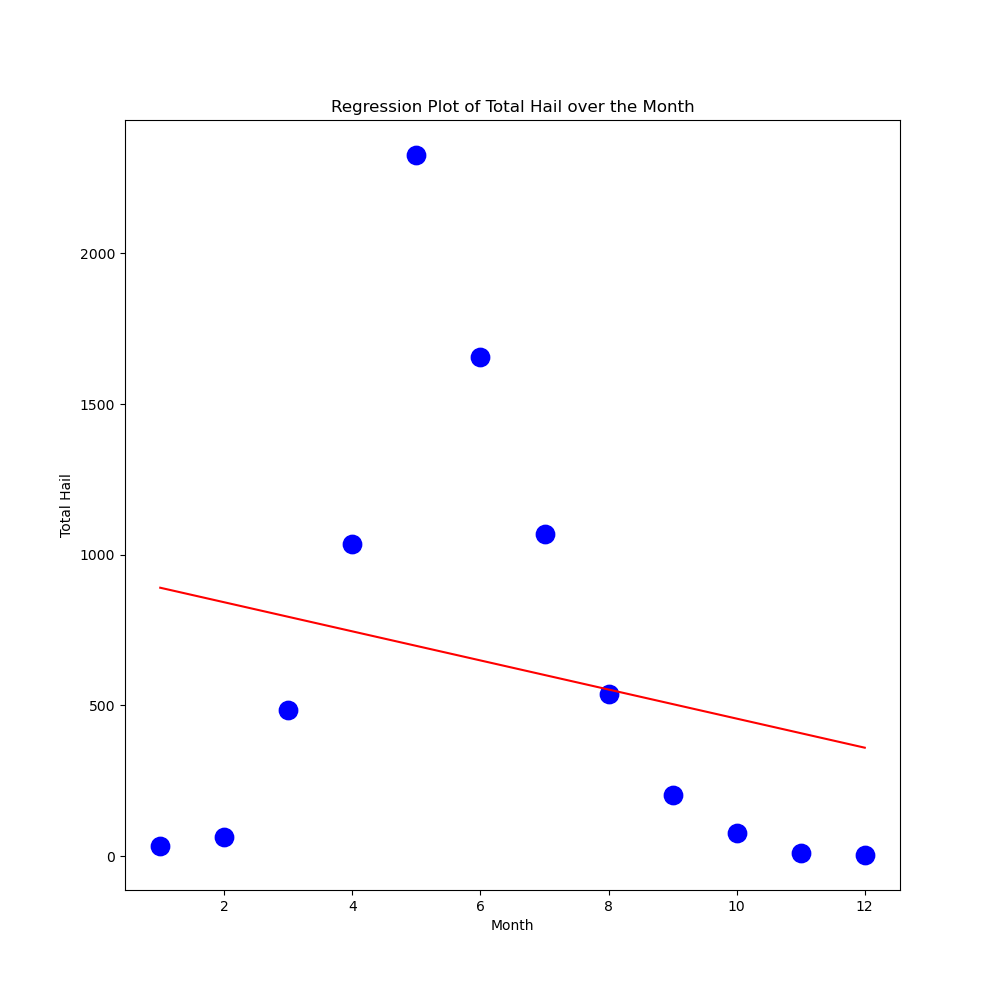

The r-squared is: 0.053199630491680465


<function matplotlib.pyplot.show(block=None)>

In [27]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Total Hail over the Month',fontsize =12)
plt.xlabel('Month',fontsize =10)
plt.ylabel('Total Hail',fontsize =10)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show

In [29]:
plt.savefig("data/MonthHail.png")
plt.show()

In [30]:
forline_df = (state_df.groupby(['Month']).size().reset_index(name = "hail reports"))
forline_df.head()

,Month,hail reports
0,1,34
1,2,65
2,3,486
3,4,1034
4,5,2326


<IPython.core.display.Javascript object>


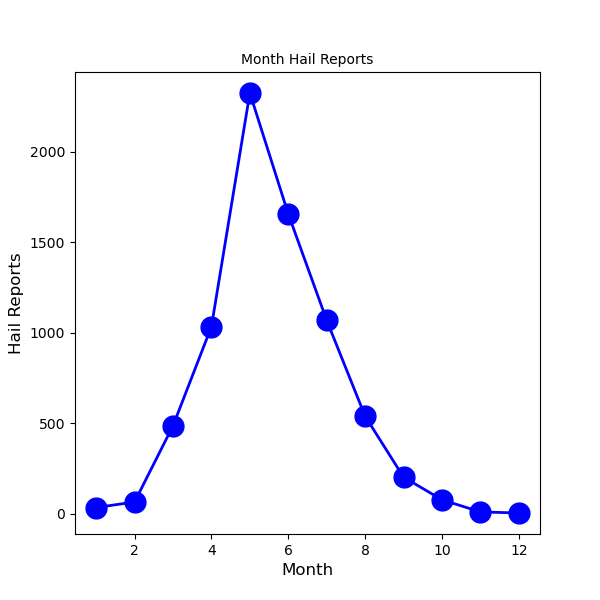

Text(0, 0.5, 'Hail Reports')

In [31]:
x_axis = forline_df['Month']
report = forline_df["hail reports"]

fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Month Hail Reports',fontsize =10)
plt.plot(x_axis, report,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Month',fontsize =12)
plt.ylabel('Hail Reports',fontsize =12)

In [32]:
plt.savefig("data/MonthHailLine.png")
plt.show()